In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\songu\Downloads\netflix_titles.csv (2)\netflix_titles.csv", encoding='utf-8-sig')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#There are some weird format in the data, so add the encoding parameter to read_csv function.
#Double check the name of the movie at index 2309. The name is in Turkish characters.
data = df['title'].iloc[2309]
print(data)

Ali Baba ve 7 Cüceler


In [5]:
#Clean the unecessary data columns
df = df.drop(['show_id', 'director', 'cast','date_added'], axis= 1)
df.head()

,type,title,country,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#Remove the null values, even though it's 10% of the dataset but later on the country is part of my prediction so I need to have complete data
df.isnull().sum()

type              0
title             0
country         831
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [7]:
df.dropna(inplace= True)
df.isnull().sum()

type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7970 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7970 non-null   object
 1   title         7970 non-null   object
 2   country       7970 non-null   object
 3   release_year  7970 non-null   int64 
 4   rating        7970 non-null   object
 5   duration      7970 non-null   object
 6   listed_in     7970 non-null   object
 7   description   7970 non-null   object
dtypes: int64(1), object(7)
memory usage: 560.4+ KB


In [9]:
#I use str.split and explode to split the genres into separate rows
split_genres = df['listed_in'].str.split(',').explode()


In [10]:
#Which genres are most connected on Netflix?
genre_counts = split_genres.value_counts()
print(genre_counts)


listed_in
 International Movies        2429
Dramas                       1527
Comedies                     1148
Action & Adventure            817
 Dramas                       789
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64


In [11]:
# Dramas appeared twice eventhough I only counted once for each genre per title, this because there is space before it so I strip it
split_genres = split_genres.str.strip()
genre_counts = split_genres.value_counts()
print(genre_counts)
# This answer that 'International Movies' is the most common genre on Netflix.

listed_in
International Movies            2543
Dramas                          2316
Comedies                        1580
International TV Shows          1127
Action & Adventure               817
Documentaries                    794
Independent Movies               745
TV Dramas                        663
Romantic Movies                  588
Thrillers                        549
Children & Family Movies         535
TV Comedies                      500
Crime TV Shows                   421
Kids' TV                         369
Horror Movies                    340
Docuseries                       330
Music & Musicals                 328
Stand-Up Comedy                  311
Romantic TV Shows                299
Sci-Fi & Fantasy                 242
British TV Shows                 237
Reality TV                       205
Sports Movies                    201
Anime Series                     153
TV Action & Adventure            153
Spanish-Language TV Shows        145
Korean TV Shows             

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_range = df[(df['release_year'] >= 1942) & (df['release_year'] <= 1979)]



Text(0, 0.5, 'Number of Movies/TV Shows')

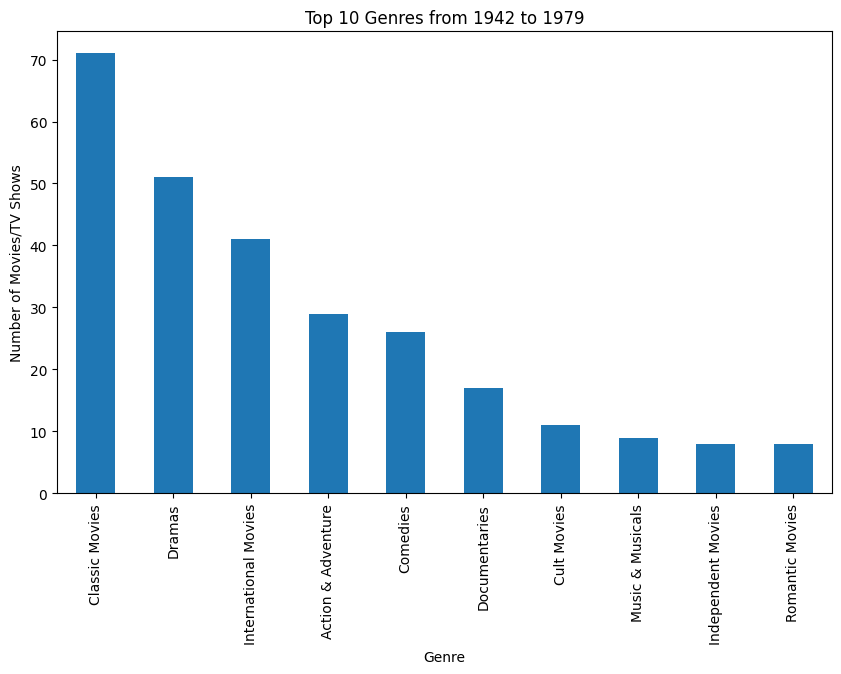

In [13]:
#Only visualize the top 10 genres in that range since there are many genres
top_genres = df_range['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres from 1942 to 1979')
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')

Text(0, 0.5, 'Number of Movies/TV Shows')

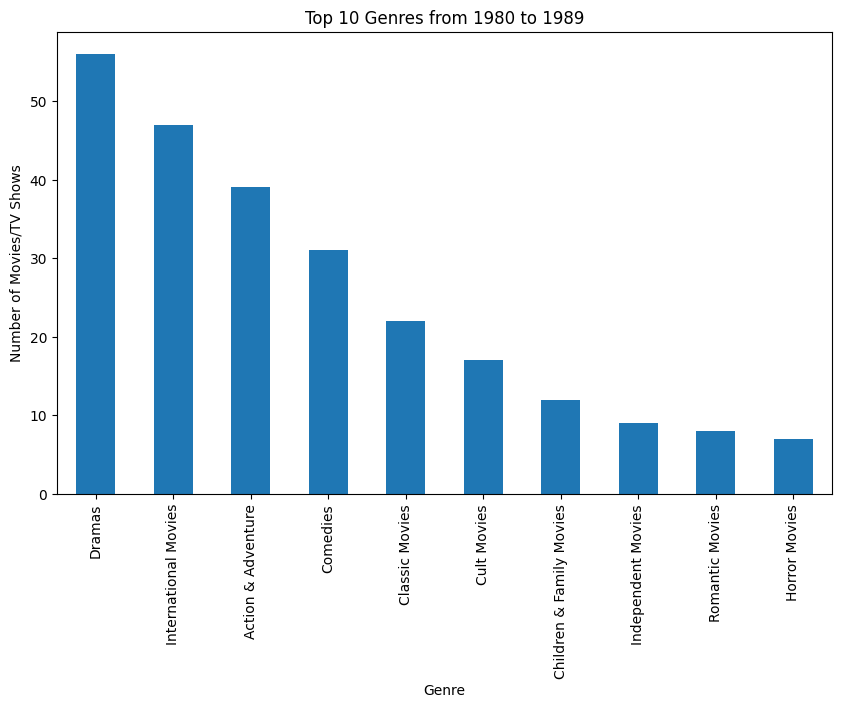

In [14]:
#Again i have to split and explode the genres for the new dataframe otherwise it will be mismatched.
df_range = df[(df['release_year'] >= 1980) & (df['release_year'] <= 1989)]
top_genres2 = df_range['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(10,6))
top_genres2.plot(kind='bar')
plt.title('Top 10 Genres from 1980 to 1989')
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')

Text(0, 0.5, 'Number of Movies/TV Shows')

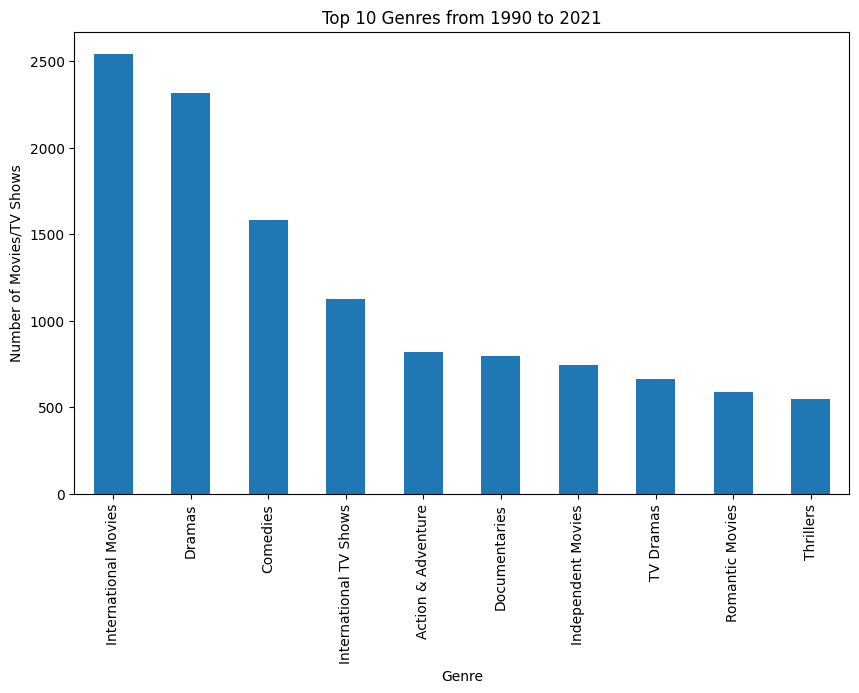

In [15]:
df_range = df[df['release_year'] >= 1990 & (df['release_year'] <= 2021)] 
top_genres3 = df_range['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(10,6))
top_genres3.plot(kind='bar')
plt.title('Top 10 Genres from 1990 to 2021')
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')

In [16]:
from sklearn.linear_model import LogisticRegression



In [17]:
#Map the 'type' column to numerical values for prediction
df['type'] = df['type'].map({'Movie': 1, 'TV Show': 0})

In [18]:
#Now since 'duration' has two different type of values (minutes and seasons), so i need to first extract the numerical part.
df['duration_num']= df['duration'].str.extract(r'(\d+)').astype(int)
df

,type,title,country,release_year,rating,duration,listed_in,description,duration_num
0,1,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,0,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
4,0,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
7,1,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
8,0,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9
...,...,...,...,...,...,...,...,...,...
8801,1,Zinzana,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,1,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,1,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,1,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [19]:
from sklearn.preprocessing import LabelEncoder
#Take only the first country if there are multiple countries listed.(Can't use explode here because it will mismatch the other columns)
df['country_main'] = df['country'].str.split(',').str[0].str.strip()
df['country_encoded'] = LabelEncoder().fit_transform(df['country_main'])
df['rating_encoded'] = LabelEncoder().fit_transform(df['rating'])
df.drop(['country','country_main','rating'], axis=1, inplace=True)
df


,type,title,release_year,duration,listed_in,description,duration_num,country_encoded,rating_encoded
0,1,Dick Johnson Is Dead,2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,80,4
1,0,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,67,8
4,0,Kota Factory,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,30,8
7,1,Sankofa,1993,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,80,8
8,0,The Great British Baking Show,2021,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,79,6
...,...,...,...,...,...,...,...,...,...
8801,1,Zinzana,2015,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96,78,8
8802,1,Zodiac,2007,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,80,5
8804,1,Zombieland,2009,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,80,5
8805,1,Zoom,2006,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,80,3


In [20]:
#Distinguish between movies and TV duration units
df['is_season'] = df['duration'].str.contains('Season').astype(int)

df

,type,title,release_year,duration,listed_in,description,duration_num,country_encoded,rating_encoded,is_season
0,1,Dick Johnson Is Dead,2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,80,4,0
1,0,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,67,8,1
4,0,Kota Factory,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,30,8,1
7,1,Sankofa,1993,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,80,8,0
8,0,The Great British Baking Show,2021,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,79,6,1
...,...,...,...,...,...,...,...,...,...,...
8801,1,Zinzana,2015,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96,78,8,0
8802,1,Zodiac,2007,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,80,5,0
8804,1,Zombieland,2009,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,80,5,0
8805,1,Zoom,2006,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,80,3,0


In [21]:
#Finally drop the original 'duration' column since i've created two new columns from it
df.drop(['duration'], axis=1, inplace=True)


In [22]:
df

,type,title,release_year,listed_in,description,duration_num,country_encoded,rating_encoded,is_season
0,1,Dick Johnson Is Dead,2020,Documentaries,"As her father nears the end of his life, filmm...",90,80,4,0
1,0,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,67,8,1
4,0,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,30,8,1
7,1,Sankofa,1993,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,80,8,0
8,0,The Great British Baking Show,2021,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,79,6,1
...,...,...,...,...,...,...,...,...,...
8801,1,Zinzana,2015,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96,78,8,0
8802,1,Zodiac,2007,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,80,5,0
8804,1,Zombieland,2009,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,80,5,0
8805,1,Zoom,2006,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,80,3,0


In [23]:
X = df[['release_year','country_encoded','rating_encoded','duration_num','is_season']]
Y = df['type']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train


,release_year,country_encoded,rating_encoded,duration_num,is_season
1894,2020,80,8,1,1
385,2021,23,8,3,1
0,2020,80,4,90,0
1827,2007,21,8,94,0
4127,2018,68,8,1,1
...,...,...,...,...,...
5908,1992,79,10,10,1
6079,2017,68,9,2,1
1197,2014,79,4,139,0
8423,2012,21,7,2,1


In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
Y_pred = model.predict(X_test)
print(Y_pred[:20])

[0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1]


In [27]:
print("Predicted: ", Y_pred[:20])
print("Actual   : ", Y_test[:20].values)

Predicted:  [0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1]
Actual   :  [0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1]


In [ ]:
#Check to see if the predictions are correct
comparison = pd.DataFrame({
    'title'    : df.loc[X_test.index, 'title'],
    'type'     : df.loc[X_test.index, 'type'],
    'actual'   : Y_test.replace({0: 'TV Show', 1: 'Movie'}),
    'predicted': pd.Series(Y_pred, index=X_test.index).replace({0: 'TV Show', 1: 'Movie'})
})
print(comparison.head(20))

                         title  type   actual predicted
3185          The Road to Love     0  TV Show   TV Show
5961                       706     1    Movie     Movie
5933               The Borgias     0  TV Show   TV Show
7245         Kurt Seyit & Sura     0  TV Show   TV Show
7194                Kid Kulafu     1    Movie     Movie
6204            Babam ve Oğlum     1    Movie     Movie
2720                   Dostana     1    Movie     Movie
1052                The Master     1    Movie     Movie
7352  Love You... Love You Not     1    Movie     Movie
8439              The Nineties     0  TV Show   TV Show
6428             Casino Tycoon     1    Movie     Movie
2066                    Erased     0  TV Show   TV Show
7811       Queen of the Desert     1    Movie     Movie
5570               Howards End     1    Movie     Movie
5027                 Marseille     0  TV Show   TV Show
773       The Girl and the Gun     1    Movie     Movie
7276      LeapFrog: Numberland     1    Movie   

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy  = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='binary')   # works with "Movie"/"TV Show"
recall    = recall_score(Y_test, Y_pred, average='binary')
f1        = f1_score(Y_test, Y_pred, average='binary')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

# Bonus: beautiful full report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00      1117

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594

